# 목표
상관관계 파악

In [28]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 폰트 설정
# print(matplotlib.__file__)
import subprocess

mpl_file = matplotlib.__file__
mpl_file_loc = '/'.join(mpl_file.split('/')[:-1]) + '/mpl-data/fonts/ttf/'

# 폰트 복사

subprocess.run(f'cp /usr/share/fonts/truetype/nanum/Nanum* {mpl_file_loc}', shell=True)
print(mpl_file_loc)
subprocess.run('rm -rf ~/.cache/matplotlib/*', shell=True)
plt.rcParams["font.family"] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지
# 커널 재시작

/home/innovation/codessey/venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/


In [29]:
class MovieDataLoader:
    def __init__(self, file_path = '../data'):
        self.file_path = file_path
        self.__load_data()

    def __load_data(self):
        for file_name in os.listdir(self.file_path):
            self.file_name = []
            if file_name.endswith('.csv'):
                setattr(self, os.path.splitext(file_name)[0], pd.read_csv(os.path.join(self.file_path, file_name)))
            if file_name.endswith('.txt'):
                setattr(self, os.path.splitext(file_name)[0], pd.read_csv(os.path.join(self.file_path, file_name), sep='\t', engine='python'))



In [30]:
movie_data_loader = MovieDataLoader()
casting = movie_data_loader.castings
countries = movie_data_loader.countries
genres = movie_data_loader.genres
movies = movie_data_loader.movies
peoples = movie_data_loader.peoples
rates = movie_data_loader.rates

In [31]:
movies_rate = movies.merge(rates, on='movie').groupby('movie')['rate'].mean().reset_index()
movies_rate = movies_rate.rename(columns={'rate': 'rate_mean'})
movies_rate.head()

movies_rate_genres = movies_rate.merge(genres, on='movie')
movies_rate_genres.head()



,movie,rate_mean,genre
0,10001,9.294360,드라마
1,10001,9.294360,멜로/로맨스
2,10002,9.416778,SF
3,10002,9.416778,코미디
4,10003,9.270981,SF


In [32]:
# check duplicated genre
genre_info = movies_rate_genres.groupby('movie').size().sort_values(ascending=False)
genre_info.describe()

# we have to handle duplicated genre for each movie
# for correlation calculation, we can use only one genre for each movie

movies_rate_genres_cleaned =  movies_rate_genres.drop_duplicates(subset='movie', ignore_index=True)
movies_rate_genres_cleaned.head()


,movie,rate_mean,genre
0,10001,9.294360,드라마
1,10002,9.416778,SF
2,10003,9.270981,SF
3,10004,9.120000,서부
4,10005,9.048619,판타지


In [44]:
# correlation visualization, as THE PROBLEM REQUIRED BUT IT IS VERY STRANGE
# WHY USE PEARSON CORRELATION? 

# 영화-장르 데이터 피벗
genre_matrix = pd.pivot_table(genres, 
                            index='movie',
                            columns='genre', 
                            aggfunc=lambda x: 1,
                            fill_value=0)

# using cross tab
# genre_matrix = pd.crosstab(genres['movie'], genres['genre'])

genre_matrix.head()
genre_matrix.describe()

genre,SF,가족,공포,느와르,다큐멘터리,드라마,멜로/로맨스,모험,뮤지컬,미스터리,범죄,서부,서사,스릴러,애니메이션,액션,에로,전쟁,코미디,판타지
count,964.000000,964.000000,964.000000,964.00000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,0.082988,0.041494,0.081950,0.01556,0.003112,0.548755,0.178423,0.121369,0.042531,0.049793,0.121369,0.032158,0.001037,0.168050,0.006224,0.218880,0.010373,0.077801,0.241701,0.057054
std,0.276007,0.199533,0.274431,0.12383,0.055728,0.497876,0.383067,0.326725,0.201902,0.217629,0.326725,0.176510,0.032208,0.374105,0.078688,0.413701,0.101373,0.267997,0.428336,0.232066
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# 장르간 상관계수 계산
genre_corr = genre_matrix.corr()


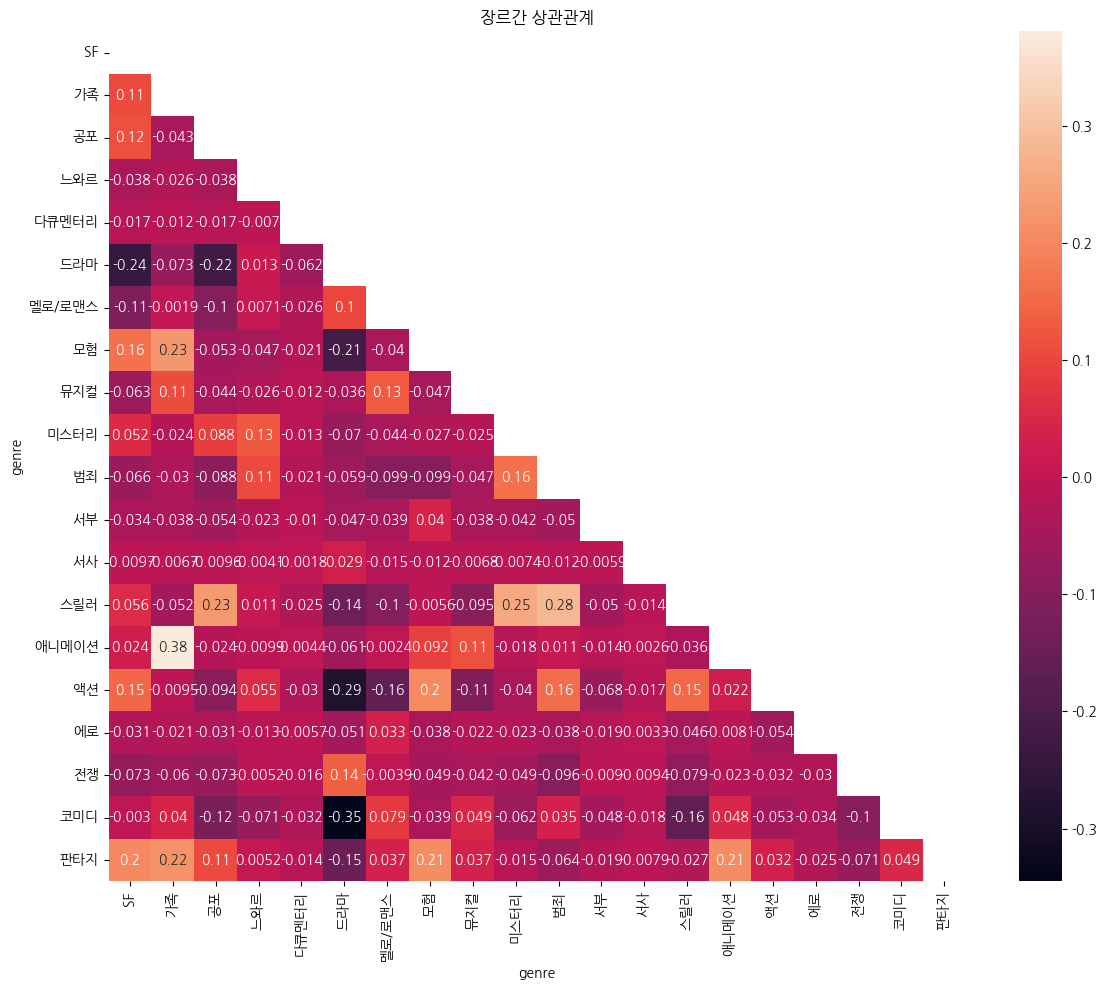

In [35]:
mask = np.triu(np.ones_like(genre_corr))

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(genre_corr, 
            annot=True,
            mask=mask)
plt.title('장르간 상관관계')
plt.tight_layout()
plt.show()


In [36]:
# 애니메이션과 가족이 같이 들어가 있는 데이터
genre_matrix = pd.pivot_table(genres, 
                            index='movie',
                            columns='genre', 
                            aggfunc=lambda x: 1,
                            fill_value=0)

# 애니메이션과 가족이 모두 1인 행 추출
or_condition = genre_matrix[(genre_matrix['애니메이션'] == 1) | (genre_matrix['가족'] == 1)][['애니메이션', '가족']]
or_condition.describe()

# 애니메이션과 가족이 모두 1인 행 추출
and_condition = genre_matrix[(genre_matrix['애니메이션'] == 1) & (genre_matrix['가족'] == 1)][['애니메이션', '가족']]
and_condition.describe()


genre,애니메이션,가족
count,6.0,6.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [37]:
user_genre_ratings = rates.merge(genres, on='movie')
# user_genre_ratings = user_genre_ratings.drop_duplicates(['user', 'movie'])
user_genre_ratings.head()


,user,movie,rate,time,genre
0,0,10003,7,1494128040,SF
1,0,10003,7,1494128040,코미디
2,0,10004,7,1467529800,서부
3,0,10004,7,1467529800,SF
4,0,10004,7,1467529800,판타지


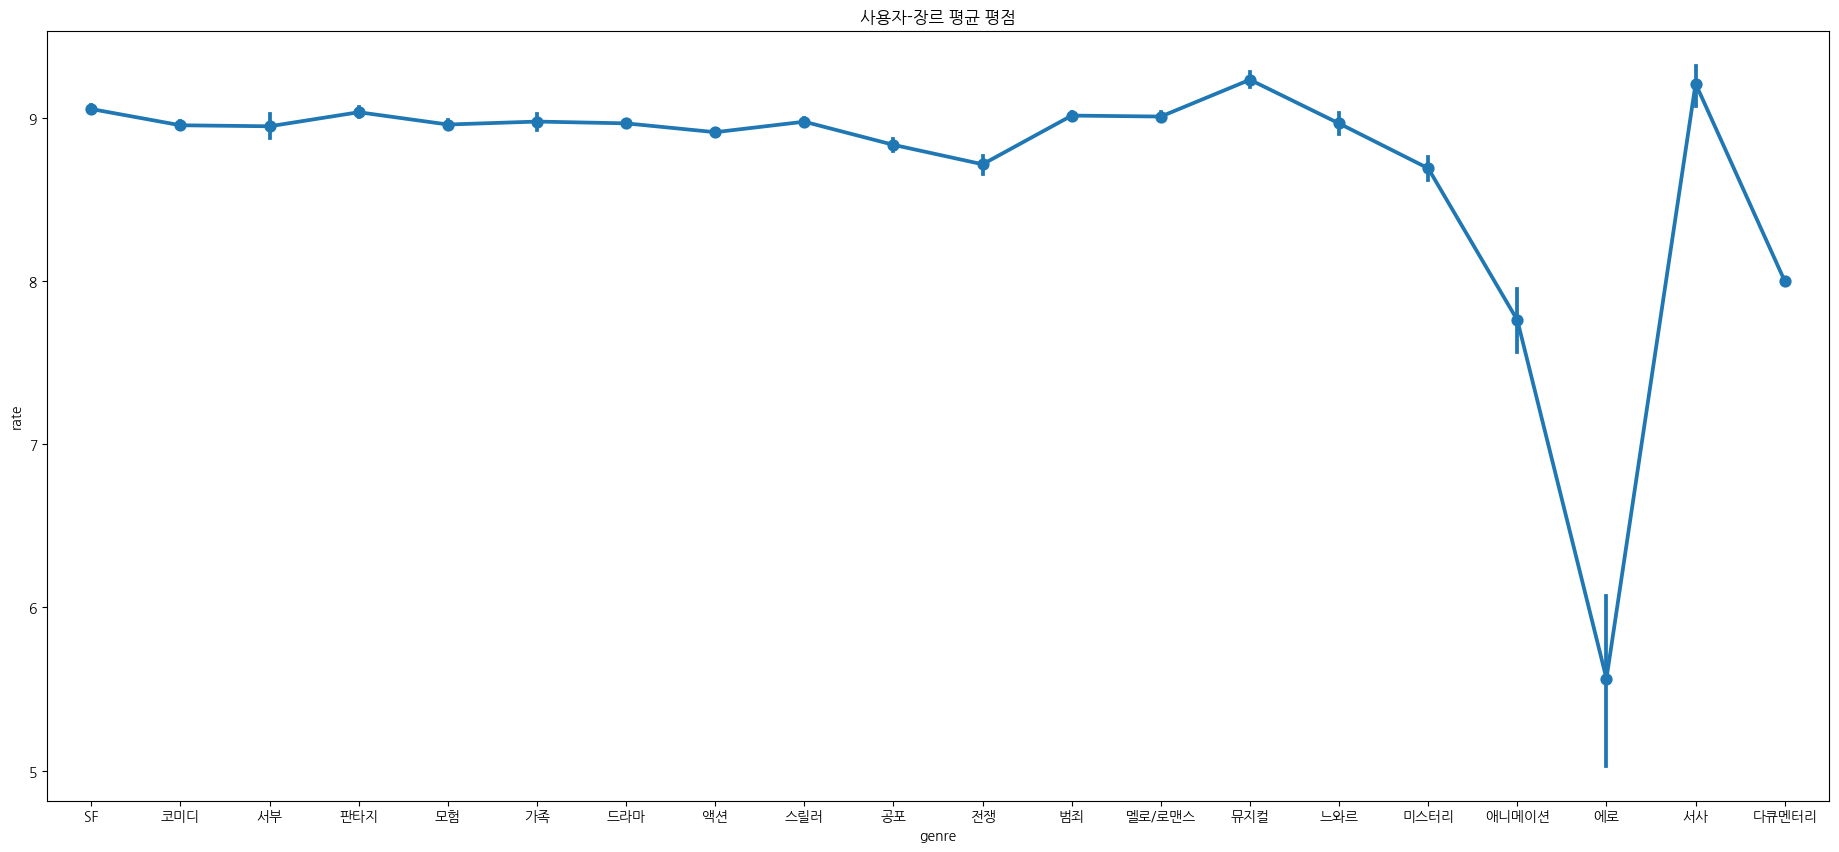

In [38]:
plt.figure(figsize=(23, 10))
plt.title('사용자-장르 평균 평점')
sns.pointplot(x='genre', y='rate', data=user_genre_ratings)
plt.show()


In [39]:
# 사용자-장르 평균 평점 매트릭스 생성, 
# THERE ARE MANY MISSING VALUES, so it's analysis is not valid

user_genre_matrix = user_genre_ratings.pivot_table(
    index='user',
    columns='genre',
    values='rate',
    aggfunc='mean',
    fill_value=0
)

user_genre_matrix


genre,SF,가족,공포,느와르,다큐멘터리,드라마,멜로/로맨스,모험,뮤지컬,미스터리,범죄,서부,서사,스릴러,애니메이션,액션,에로,전쟁,코미디,판타지
user,,,,,,,,,,,,,,,,,,,,
0,7.818182,7.333333,9.000000,8.5,0.0,7.266667,7.315789,7.000000,6.750000,8.000000,8.285714,6.666667,0.0,8.333333,7.0,7.291667,0.0,7.0,6.933333,6.833333
1,0.000000,0.000000,0.000000,0.0,0.0,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,7.250000,0.000000,7.800000,0.0,0.0,7.571429,9.666667,8.000000,0.000000,0.000000,0.000000,10.000000,0.0,7.333333,0.0,7.250000,0.0,9.0,8.000000,8.500000
3,8.000000,7.000000,8.333333,0.0,0.0,7.410714,7.285714,7.666667,7.666667,8.333333,8.666667,9.500000,0.0,7.611111,0.0,7.533333,3.0,7.0,7.454545,7.600000
4,5.000000,4.500000,7.000000,4.0,0.0,6.906977,7.083333,6.800000,9.000000,6.666667,6.333333,7.000000,0.0,7.000000,2.0,6.181818,0.0,7.8,6.666667,8.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52023,0.000000,0.000000,0.000000,0.0,0.0,10.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,10.000000,0.0,10.000000,0.0,0.0,0.000000,0.000000
52024,0.000000,0.000000,0.000000,0.0,0.0,10.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,10.000000,0.0,10.000000,0.0,0.0,0.000000,0.000000
52025,0.000000,0.000000,0.000000,0.0,0.0,7.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.000000,0.0,7.000000,0.0,0.0,0.000000,0.000000


In [40]:
# # 장르간 상관관계 계산
genre_correlations = user_genre_matrix.corr('spearman')
genre_correlations



genre,SF,가족,공포,느와르,다큐멘터리,드라마,멜로/로맨스,모험,뮤지컬,미스터리,범죄,서부,서사,스릴러,애니메이션,액션,에로,전쟁,코미디,판타지
genre,,,,,,,,,,,,,,,,,,,,
SF,1.000000,0.164484,0.244978,0.037481,-0.003956,-0.311436,-0.110972,0.148229,-0.002251,0.093148,0.002616,0.125877,0.031417,0.460088,0.126684,0.490256,0.023973,0.055663,0.197721,0.208836
가족,0.164484,1.000000,0.100942,0.078904,-0.002381,-0.163774,0.041433,0.634445,0.175881,0.115404,0.347198,0.110890,0.068938,0.054818,0.375780,0.015181,0.050004,0.091413,0.489060,0.276633
공포,0.244978,0.100942,1.000000,0.115083,-0.002772,-0.145091,0.097226,0.103000,0.055486,0.291852,0.169696,0.124657,0.074137,0.377700,0.065205,0.191023,0.053012,0.123199,0.075733,0.281349
느와르,0.037481,0.078904,0.115083,1.000000,0.010923,0.065099,0.027037,0.065287,0.058623,0.126663,0.328329,0.121884,0.085506,0.061951,0.066173,0.289893,0.055446,0.145226,0.042086,0.094847
다큐멘터리,-0.003956,-0.002381,-0.002772,0.010923,1.000000,0.006336,0.002505,0.004514,-0.002129,-0.001444,0.003725,-0.001259,-0.000901,0.003077,-0.000928,0.001870,-0.000275,-0.001987,0.003677,0.005431
드라마,-0.311436,-0.163774,-0.145091,0.065099,0.006336,1.000000,0.206616,-0.102143,0.139002,0.015189,0.079210,0.007086,0.063350,-0.145627,-0.065693,-0.163851,-0.012839,0.126699,-0.216081,-0.156711
멜로/로맨스,-0.110972,0.041433,0.097226,0.027037,0.002505,0.206616,1.000000,0.077289,0.413962,0.057077,-0.022197,0.049735,0.017578,-0.097776,0.080691,-0.078863,0.030525,0.128050,0.104596,0.317392
모험,0.148229,0.634445,0.103000,0.065287,0.004514,-0.102143,0.077289,1.000000,0.111850,0.122788,0.297626,0.204676,0.060435,0.069091,0.130328,0.154884,0.036846,0.126163,0.342596,0.352204
뮤지컬,-0.002251,0.175881,0.055486,0.058623,-0.002129,0.139002,0.413962,0.111850,1.000000,0.093511,0.023749,0.102932,0.064739,-0.008303,0.203797,-0.056933,0.041966,0.096493,0.106559,0.133436


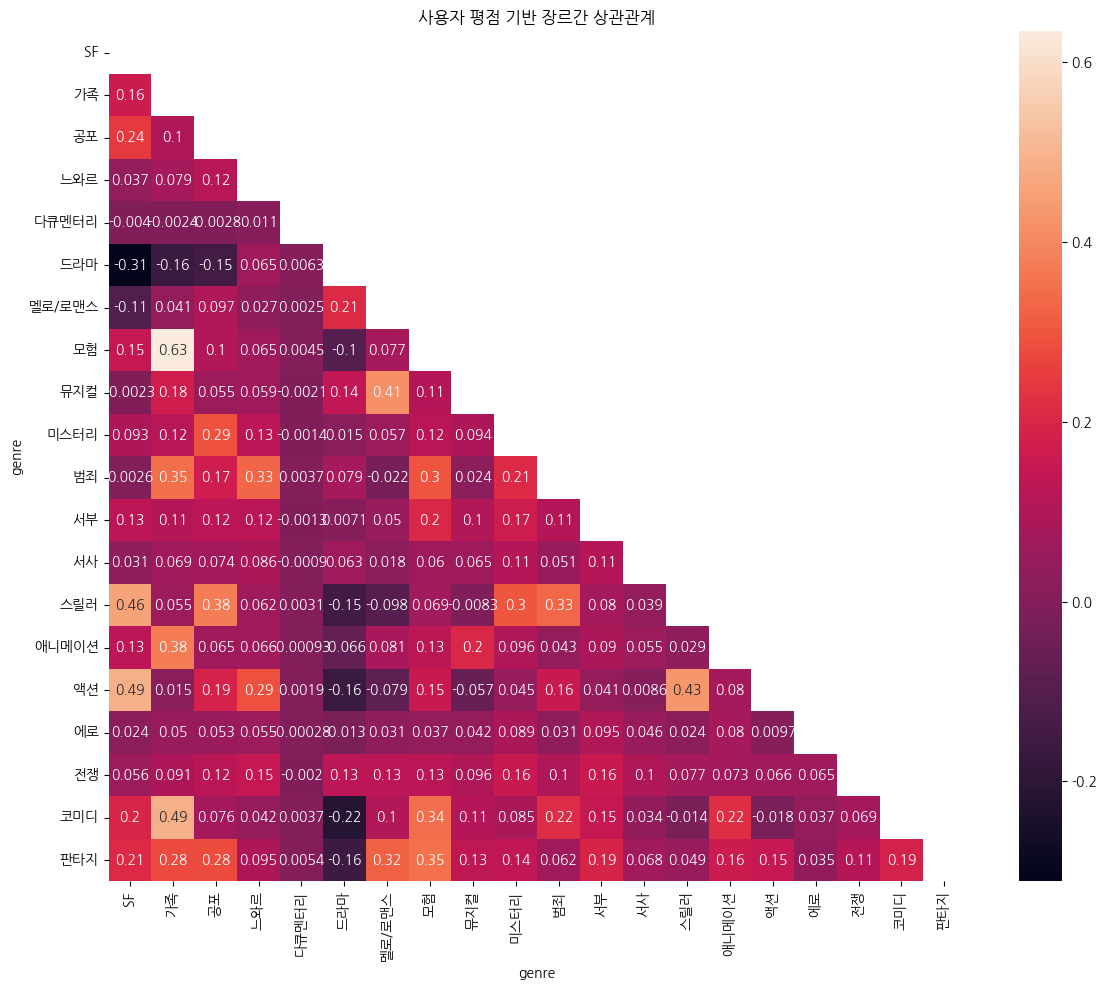

In [41]:
# # 시각화
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(genre_correlations))
sns.heatmap(genre_correlations, 
            annot=True,
            mask=mask)
plt.title('사용자 평점 기반 장르간 상관관계')
plt.tight_layout()
plt.show()


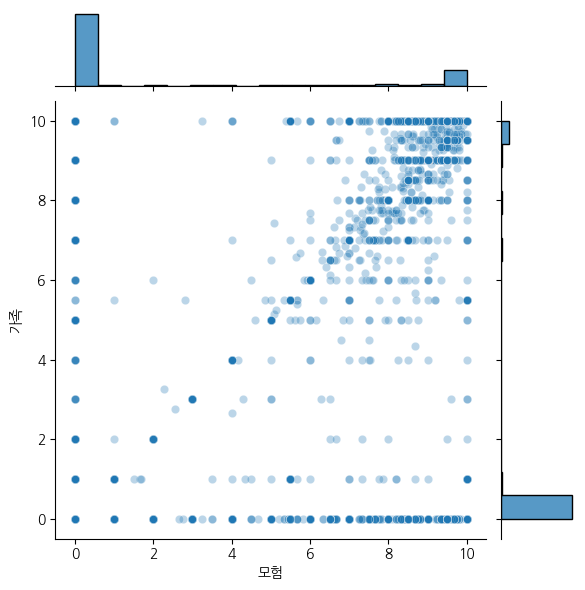

In [46]:

## 모험-가족 장르간 시각화

sns.jointplot(x=user_genre_matrix['모험'], y=user_genre_matrix['가족'], kind='scatter', alpha=0.3)
plt.show()

# + alpha
[결정계수](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)